In [1]:
import pandas as pd

In [2]:
!pip install tweet-preprocessor
import preprocessor as p

In [ ]:
! pip install -q kaggle
from google.colab import files
files.upload()

In [4]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
!cp /content/drive/MyDrive/ExpertSystem/clean_data.csv /content/

In [6]:
df_0 = pd.read_csv("/content/clean_data.csv")

In [7]:
df_0.head()

,is_offensive,text
0,0,Then go to the village pump and suggest they c...
1,1,ANTI GREEK NATIONALIS -WIKIPEDIA \n\nHi Alexik...
2,1,Dis hoe wasnt dis violent on Lottery Ticket 😂😂
3,0,It is better for Atabay not helping the banned...
4,0,"""is in CamelCase. """"SiCKO"""" is not CamelCase,..."


In [8]:
len(df_0.is_offensive)

184354

In [9]:
text_overall = []
label_overall = []

In [10]:
for i in range(len(df_0.is_offensive)):
  text_overall.append(df_0['text'][i])
  label_overall.append(df_0['is_offensive'][i])

In [11]:
count_n = 0
count_h = 0
for val in label_overall:
  if val == 0:
    count_n += 1
  else:
    count_h += 1

print("Normal: {}".format(count_n))
print("Abusive: {}".format(count_h))

Normal: 147509
Abusive: 36845


In [12]:
!kaggle datasets download -d vkrahul/twitter-hate-speech

  0% 0.00/1.89M [00:00<?, ?B/s]
100% 1.89M/1.89M [00:00<00:00, 64.0MB/s]


In [13]:
!unzip /content/twitter-hate-speech.zip

Archive:  /content/twitter-hate-speech.zip
  inflating: test_tweets_anuFYb8.csv  
  inflating: train_E6oV3lV.csv       


In [14]:
df2 = pd.read_csv('/content/train_E6oV3lV.csv')

In [15]:
df2.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [16]:
df2 = df2.drop(columns=['id'])

In [17]:
df2.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [18]:
df2.label.unique()

array([0, 1])

In [19]:
clean_text  = []
labels = []
for i in range(len(df2['tweet'])):
  clean_ = p.clean(df2['tweet'][i])
  clean_text.append(clean_)
  labels.append(df2['label'][i])

In [20]:
df2 = pd.DataFrame(list(zip(labels, clean_text)),
                  columns = ['label','tweet'])

In [21]:
df2.head()

,label,tweet
0,0,when a father is dysfunctional and is so selfi...
1,0,thanks for credit i can't use cause they don't...
2,0,bihday your majesty
3,0,i love u take with u all the time in ur!!!
4,0,factsguide: society now


In [22]:
for i in range(len(df2['label'])):
  if df2.label[i] == 1:
    label_overall.append(df2['label'][i])
    text_overall.append(df2['tweet'][i])

In [23]:
len(label_overall)

186596

In [24]:
len(text_overall)

186596

In [25]:
count_n = 0
count_h = 0
for val in label_overall:
  if val == 0:
    count_n += 1
  else:
    count_h += 1

print("Normal: {}".format(count_n))
print("Abusive: {}".format(count_h))

Normal: 147509
Abusive: 39087


In [26]:
!git clone "https://github.com/t-davidson/hate-speech-and-offensive-language.git"

Cloning into 'hate-speech-and-offensive-language'...
remote: Enumerating objects: 32, done.
remote: Total 32 (delta 0), reused 0 (delta 0), pack-reused 32
Unpacking objects: 100% (32/32), done.


In [27]:
df3 = pd.read_csv('/content/hate-speech-and-offensive-language/data/labeled_data.csv')

In [28]:
df3.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [29]:
df3 = df3.drop(columns=['Unnamed: 0','count', 'hate_speech', 'offensive_language','neither'])

In [30]:
df3.head()

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [31]:
df3['class'].unique()

array([2, 1, 0])

In [32]:
clean_text  = []
labels = []
for i in range(len(df3['tweet'])):
  clean_ = p.clean(df3['tweet'][i])
  clean_text.append(clean_)
  labels.append(df3['class'][i])

In [33]:
df3 = pd.DataFrame(list(zip(labels, clean_text)),
                  columns = ['label','tweet'])

In [34]:
df3.head()

,label,tweet
0,2,!!! RT : As a woman you shouldn't complain abo...
1,1,!!!!! RT : boy dats cold...tyga dwn bad for cu...
2,1,!!!!!!! RT Dawg!!!! RT : You ever fuck a bitch...
3,1,!!!!!!!!! RT : she look like a tranny
4,1,!!!!!!!!!!!!! RT : The shit you hear about me ...


In [35]:
for i in range(len(df3['label'])):
  if df3['label'][i] != 2:
    text_overall.append(df3['tweet'][i])
    label_overall.append(1)

In [36]:
count_n = 0
count_h = 0
for val in label_overall:
  if val == 0:
    count_n += 1
  else:
    count_h += 1

print("Normal: {}".format(count_n))
print("HateSpeech: {}".format(count_h))

Normal: 147509
HateSpeech: 59707


# MMHS150K


In [37]:
!cp /content/drive/MyDrive/ExpertSystem/MMHS150K_GT.json /content/

In [38]:
df4 = pd.read_json('/content/MMHS150K_GT.json')

In [39]:
df4 = df4.transpose()

In [40]:
df4.head()

,img_url,labels,tweet_url,tweet_text,labels_str
2005-04-28 09:09:13.714016256,http://pbs.twimg.com/tweet_video_thumb/D3gi9MH...,"[4, 1, 3]",https://twitter.com/user/status/11146793537140...,@FriskDontMiss Nigga https://t.co/cAsaLWEpue,"[Religion, Racist, Homophobe]"
2003-09-08 11:20:48.816660480,http://pbs.twimg.com/ext_tw_video_thumb/106301...,"[5, 5, 5]",https://twitter.com/user/status/10630200488166...,My horses are retarded https://t.co/HYhqc6d5WN,"[OtherHate, OtherHate, OtherHate]"
2005-02-20 19:22:48.075374593,http://pbs.twimg.com/media/D2OzhzHUwAADQjd.jpg,"[0, 0, 0]",https://twitter.com/user/status/11089273680753...,“NIGGA ON MA MOMMA YOUNGBOY BE SPITTING REAL S...,"[NotHate, NotHate, NotHate]"
2005-04-26 23:35:34.635618305,http://pbs.twimg.com/ext_tw_video_thumb/111401...,"[1, 0, 0]",https://twitter.com/user/status/11145585346356...,RT xxSuGVNGxx: I ran into this HOLY NIGGA TODA...,"[Racist, NotHate, NotHate]"
2002-10-22 02:08:00.215592966,http://pbs.twimg.com/media/Dl30pGIU8AAVGxO.jpg,"[1, 0, 1]",https://twitter.com/user/status/10352524802155...,“EVERYbody calling you Nigger now!” https://t....,"[Racist, NotHate, Racist]"


In [41]:
df4 = df4.drop(columns= ["img_url", "tweet_url"])

In [42]:
df4.reset_index(inplace=True)

In [43]:
df4 = df4.drop(columns=["index"])

In [44]:
df4

,labels,tweet_text,labels_str
0,"[4, 1, 3]",@FriskDontMiss Nigga https://t.co/cAsaLWEpue,"[Religion, Racist, Homophobe]"
1,"[5, 5, 5]",My horses are retarded https://t.co/HYhqc6d5WN,"[OtherHate, OtherHate, OtherHate]"
2,"[0, 0, 0]",“NIGGA ON MA MOMMA YOUNGBOY BE SPITTING REAL S...,"[NotHate, NotHate, NotHate]"
3,"[1, 0, 0]",RT xxSuGVNGxx: I ran into this HOLY NIGGA TODA...,"[Racist, NotHate, NotHate]"
4,"[1, 0, 1]",“EVERYbody calling you Nigger now!” https://t....,"[Racist, NotHate, Racist]"
...,...,...,...
149818,"[2, 5, 0]",@svdate @gtconway3d I would just say hes Donny...,"[Sexist, OtherHate, NotHate]"
149819,"[0, 0, 0]",@Cheftime_Dev congrats my nigga keep on grindi...,"[NotHate, NotHate, NotHate]"
149820,"[0, 1, 0]",My nigga big shitty https://t.co/e0snJGBgH9,"[NotHate, Racist, NotHate]"
149821,"[1, 0, 0]",did she just say “my nigga” to Rich? &amp; she...,"[Racist, NotHate, NotHate]"


In [45]:
clean_text  = []
labels = []
for i in range(len(df4['labels'])):
  clean_ = p.clean(df4['tweet_text'][i])
  clean_text.append(clean_)
  labels.append(df4['labels'][i])

In [46]:
df4 = pd.DataFrame(list(zip(labels, clean_text)),
                  columns = ['labels','tweet_text'])

In [47]:
df4.head()

,labels,tweet_text
0,"[4, 1, 3]",Nigga
1,"[5, 5, 5]",My horses are retarded
2,"[0, 0, 0]",NIGGA ON MA MOMMA YOUNGBOY BE SPITTING REAL SH...
3,"[1, 0, 0]",xxSuGVNGxx: I ran into this HOLY NIGGA TODAY
4,"[1, 0, 1]",EVERYbody calling you Nigger now!


In [48]:
omit = [0,0,0]
for i in range(len(df4['labels'])):
  if (df4['labels'][i]!=omit):
    text_overall.append(df4['tweet_text'][i])
    label_overall.append(1)
  else:
    text_overall.append(df4['tweet_text'][i])
    label_overall.append(0)

In [49]:
count_n = 0
count_h = 0
for val in label_overall:
  if val == 0:
    count_n += 1
  else:
    count_h += 1

print("Normal: {}".format(count_n))
print("Abusive: {}".format(count_h))

Normal: 205399
Abusive: 151640


In [50]:
df = pd.DataFrame(list(zip(text_overall, label_overall)),
                  columns = ['text','label'])

In [51]:
df.head()

,text,label
0,Then go to the village pump and suggest they c...,0
1,ANTI GREEK NATIONALIS -WIKIPEDIA \n\nHi Alexik...,1
2,Dis hoe wasnt dis violent on Lottery Ticket 😂😂,1
3,It is better for Atabay not helping the banned...,0
4,"""is in CamelCase. """"SiCKO"""" is not CamelCase,...",0


In [52]:
count_n = 0
count_a = 0
for i in range(len(df['text'])):
  if df['label'][i] == 0:
    count_n += 1
  else:
    count_a += 1

print("Neutral: ", count_n)
print("abusive: ", count_a)

Neutral:  205399
abusive:  151640


In [53]:
df = df.sample(frac = 1)
df = df.sample(frac = 1)
df = df.sample(frac = 1)

In [54]:
df = df.reset_index(drop=True)

In [55]:
df

,text,label
0,Bailey has gone for a sleep over I feel crap i...,0
1,"""\n \nCustom500\n\nIts my user page, ill edit ...",0
2,"It seems to me that when creating this page, s...",0
3,Bring my nigga Nip back!,0
4,Still you havent explained why it is a POV and...,0
...,...,...
357034,"Built that Wall ,",1
357035,Do we need the all music rating? \n\nDo we rea...,0
357036,"REDIRECT Talk:Stuart Gray (footballer, born 1973)",0
357037,"Im married to a retard, must be why we're so g...",1


In [56]:
df.to_csv('cleaned_abusive_nonabusive.csv', index=False)

In [57]:
!cp /content/cleaned_abusive_nonabusive.csv /content/drive/MyDrive/ExpertSystem/

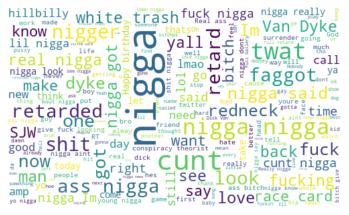

In [58]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
word_text = " ".join(map(str, clean_text))
wordcloud = WordCloud(max_font_size=60, max_words=200, background_color="white", width=500, height = 300).generate(word_text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()